In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pylab as pylab
plt.style.use('ggplot')

params = {'legend.fontsize': '8',
         'axes.labelsize': '10',
         'axes.titlesize':'14',
         'xtick.labelsize':'10',
         'ytick.labelsize':'10',
         'figure.figsize':[12.0, 6.0]}
         
pylab.rcParams.update(params)

# Ebola 1 Trend Visuals

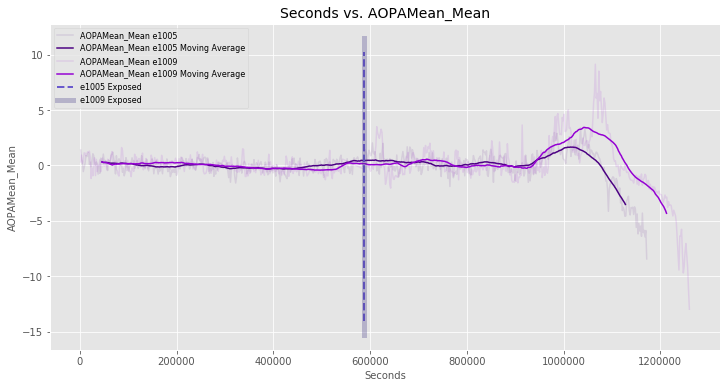

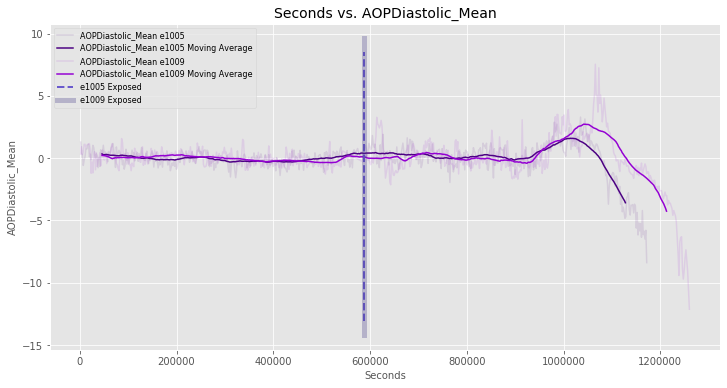

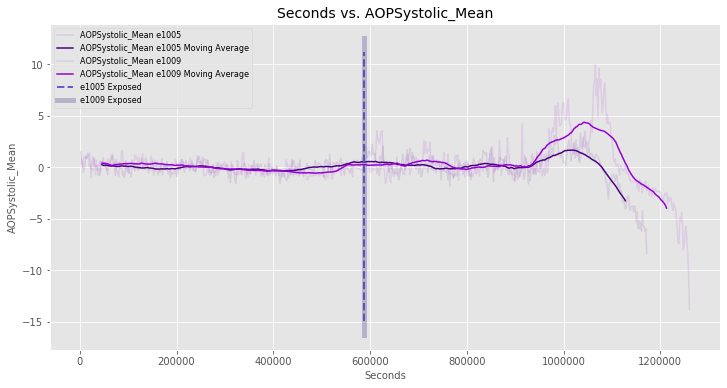

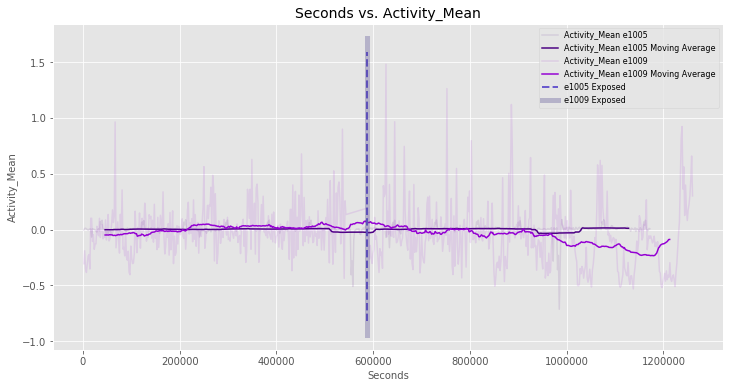

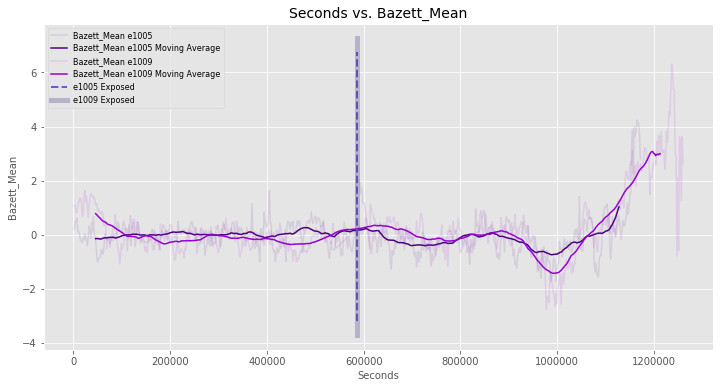

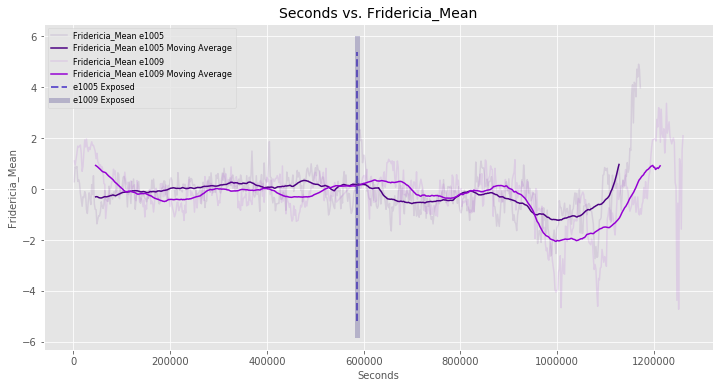

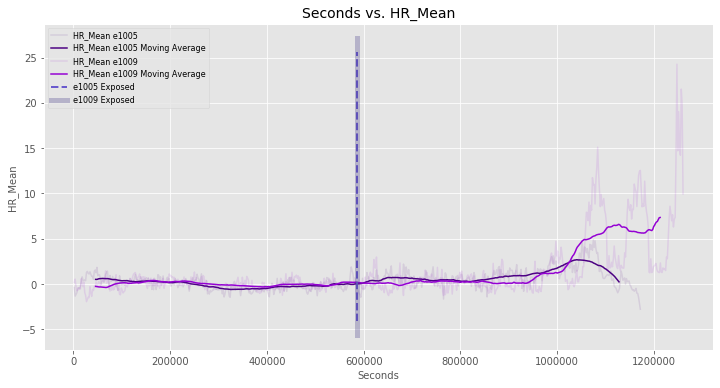

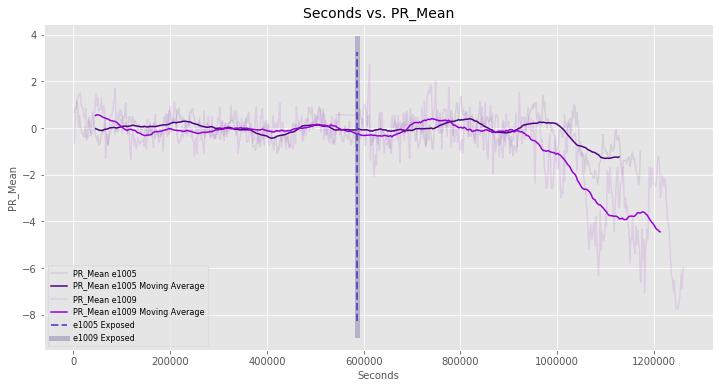

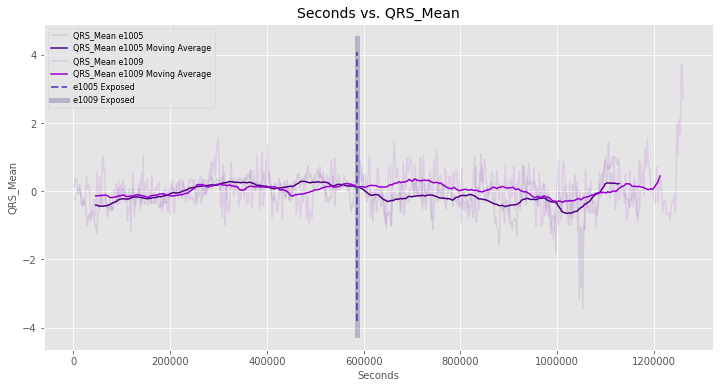

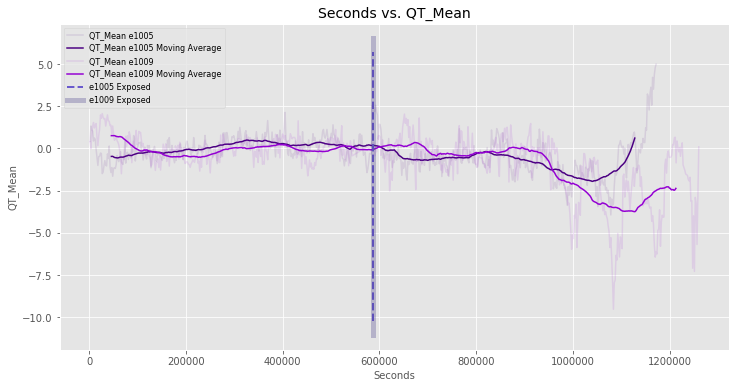

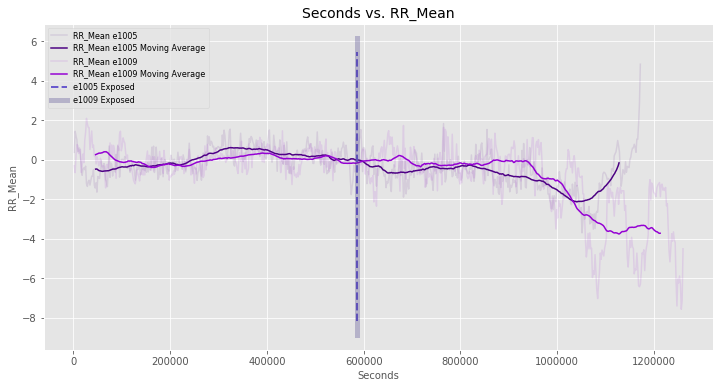

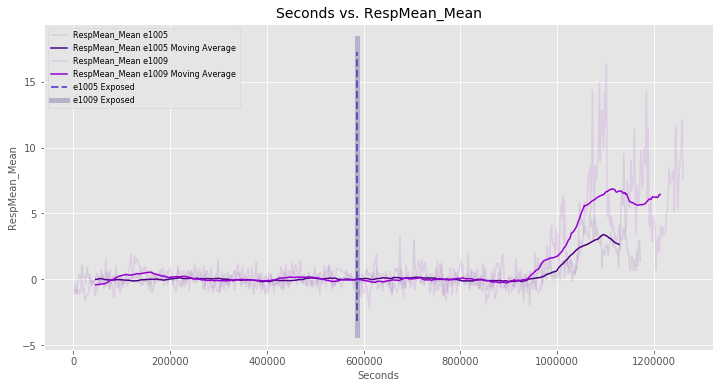

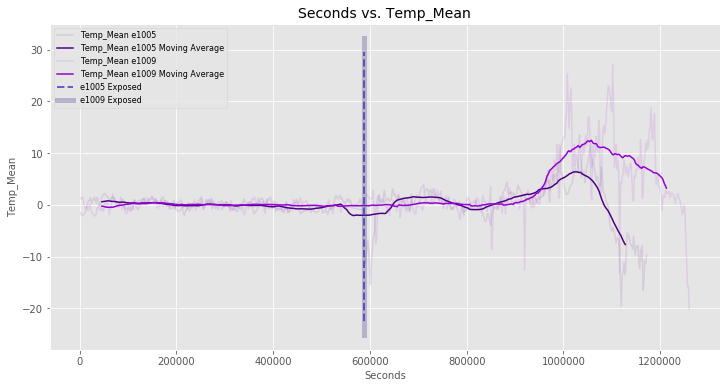

In [110]:
def plot(table):
    df = pd.read_csv(table)
    cols = df.columns[5:]
    _, idx = np.unique([col.split('_')[0] for col in cols], return_index=True)
    cols = cols[np.sort(idx)]
    
    top_two = list(df['SubjectName'].value_counts().index[:2])
    top_two_df = df[df['SubjectName'].isin(top_two)]
    subjs = top_two_df['SubjectName']

    for c in cols[:-1]:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.plot('TimeS', c, data=top_two_df[
            subjs == np.unique(subjs)[0]], alpha=0.1, color='indigo', label=(c + ' ' + np.unique(subjs)[0]))
        ax.plot('TimeS', c, data=top_two_df[
            subjs == np.unique(subjs)[0]].rolling(50).mean(), color='indigo', label=(c + ' ' + np.unique(subjs)[0] + ' Moving Average'))
        ax.plot('TimeS', c, data=top_two_df[
            subjs == np.unique(subjs)[1]], alpha=0.1, color='darkviolet', label=(c + ' ' + np.unique(subjs)[1]))
        ax.plot('TimeS', c, data=top_two_df[
            subjs == np.unique(subjs)[1]].rolling(50).mean(), color='darkviolet', label=(c + ' ' + np.unique(subjs)[1] + ' Moving Average'))
        exposed0 = top_two_df[(top_two_df['SubjectName'] == np.unique(subjs)[0]) & (top_two_df['Y'] == 1)]['TimeS'].to_list()[0]
        exposed1 = top_two_df[(top_two_df['SubjectName'] == np.unique(subjs)[0]) & (top_two_df['Y'] == 1)]['TimeS'].to_list()[0]
        ax.plot((exposed0, exposed0), (ax.get_ylim()[0], ax.get_ylim()[1]), '--', c='slateblue', label=(np.unique(subjs)[0] + ' Exposed'), lw=2)
        ax.plot((exposed1, exposed1), (ax.get_ylim()[0], ax.get_ylim()[1]), c='darkslateblue', label=(np.unique(subjs)[1] + ' Exposed'), lw=5, alpha=0.3)
        ax.set_title('Seconds vs. ' + c)
        ax.set_ylabel(c)
        ax.set_xlabel('Seconds')
        ax.legend()
        plt.show()
            
plot('EBOV-Cyno-Aero-1.csv-Table 1.csv')

# Ebola 2 Trend Visuals

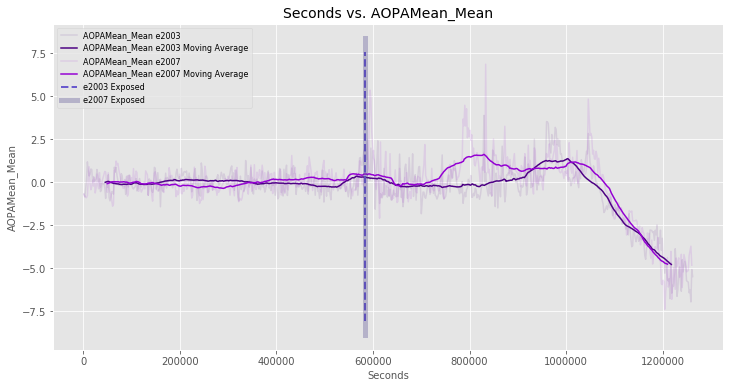

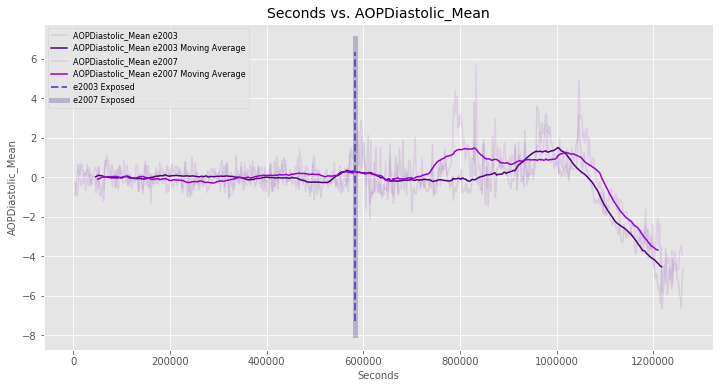

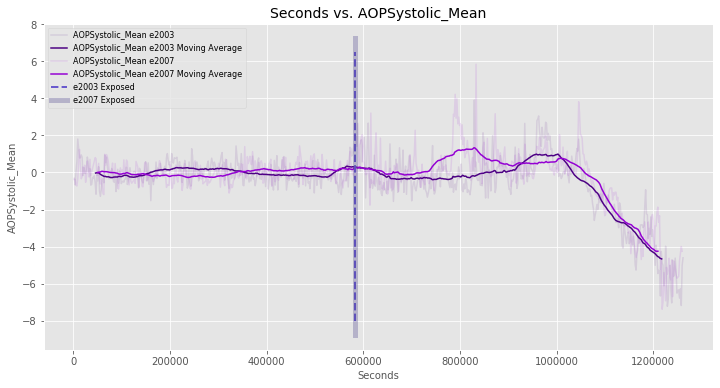

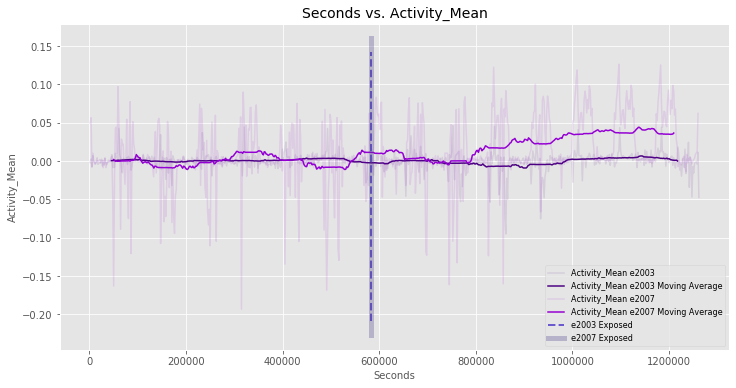

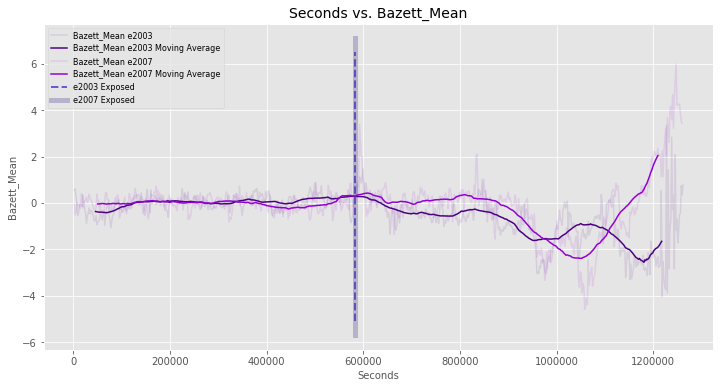

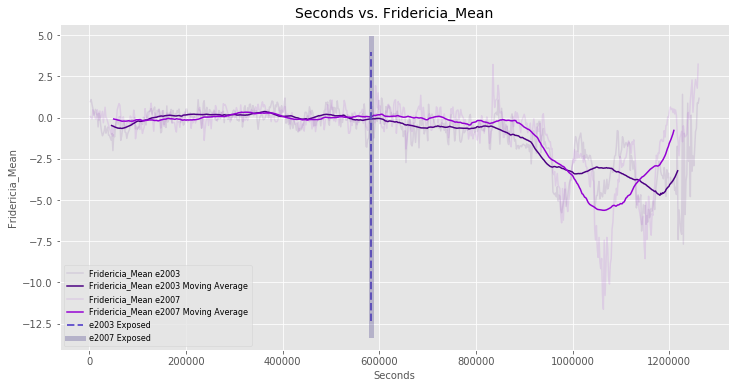

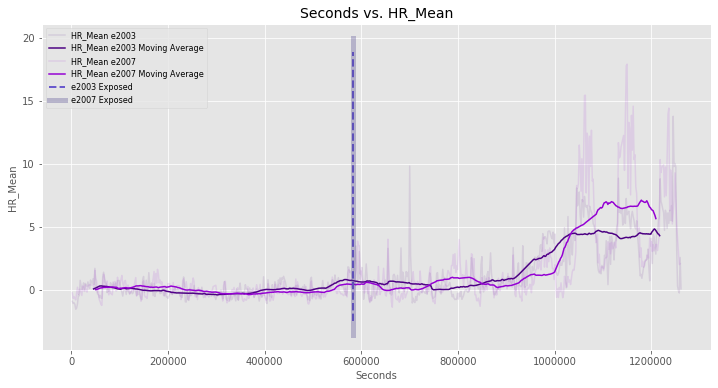

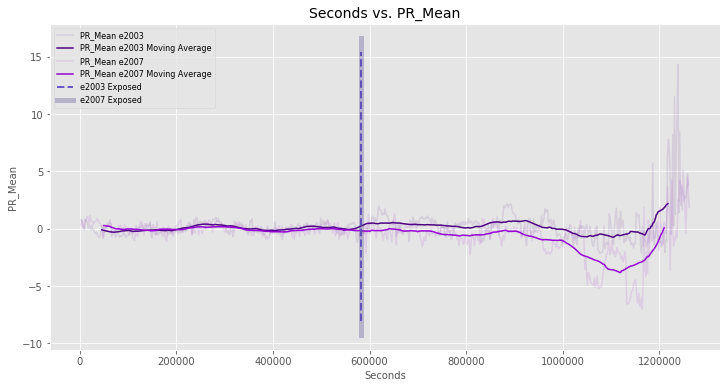

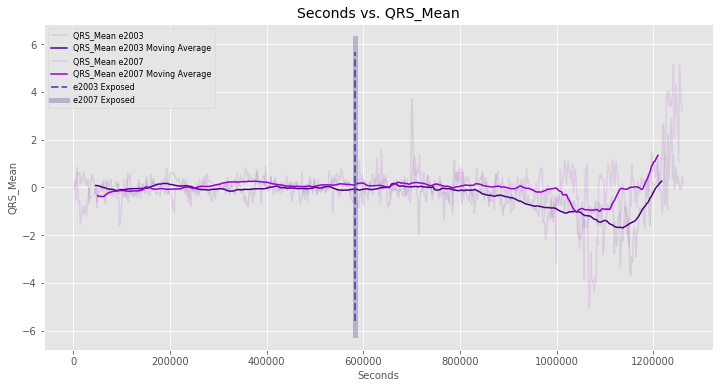

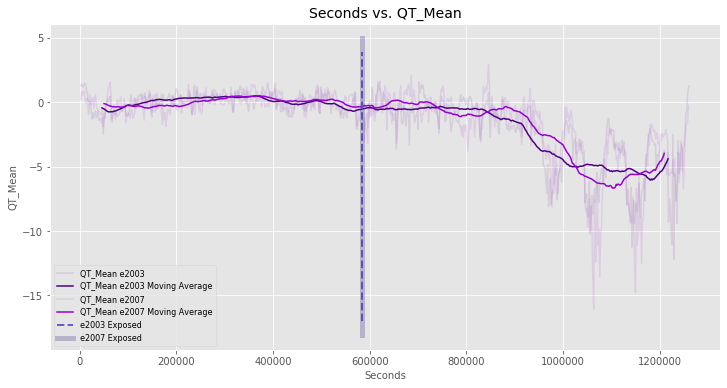

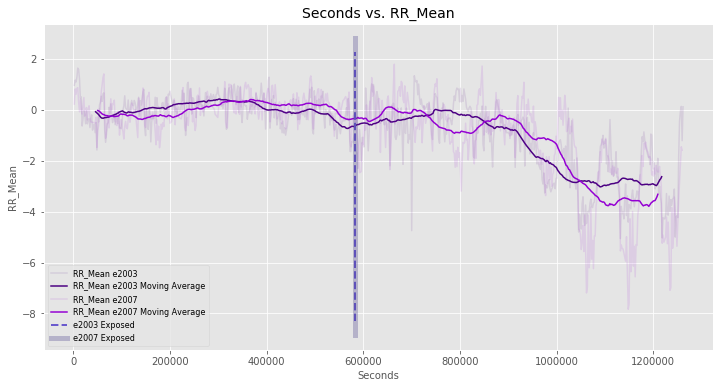

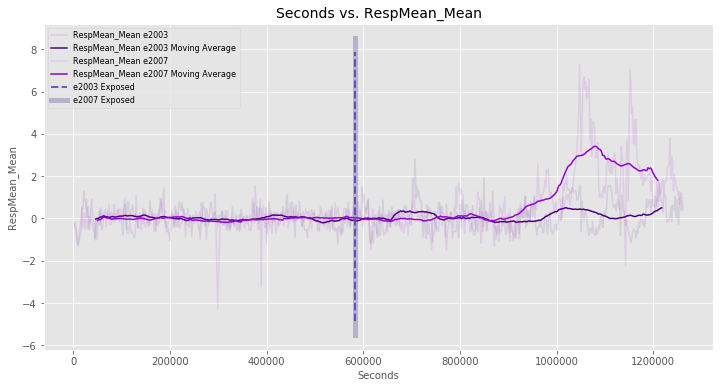

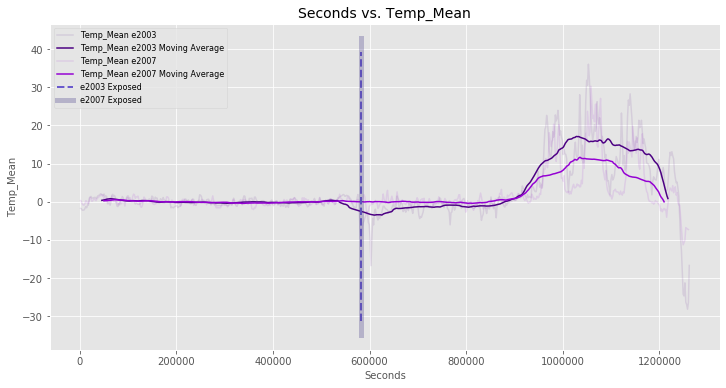

In [111]:
plot('EBOV-Cyno-Aero-2.csv-Table 1.csv')

# Lassa Trend Visuals

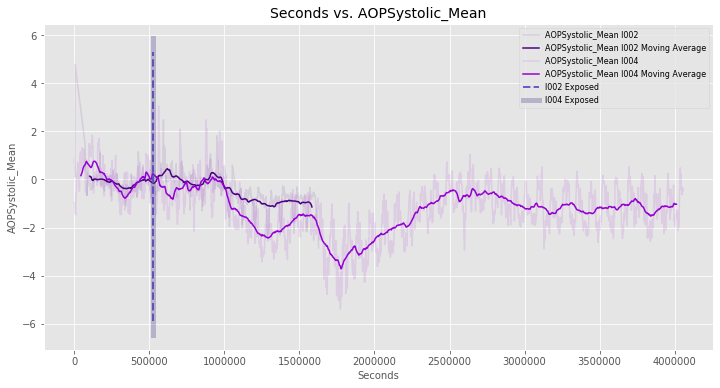

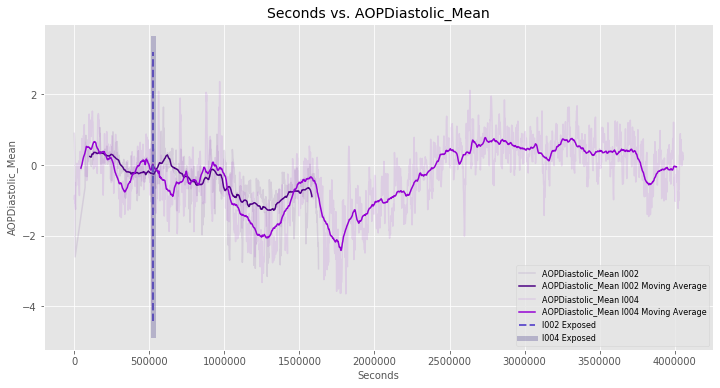

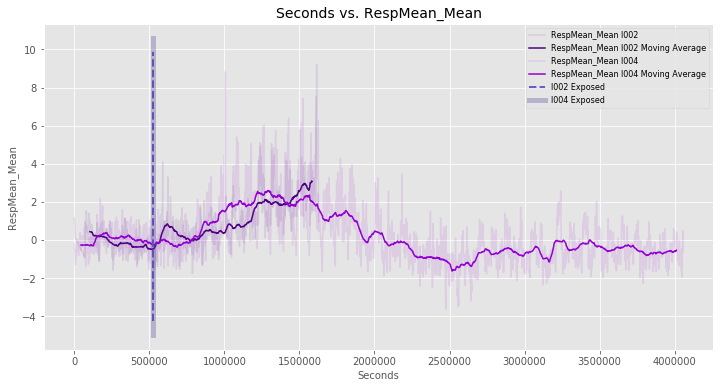

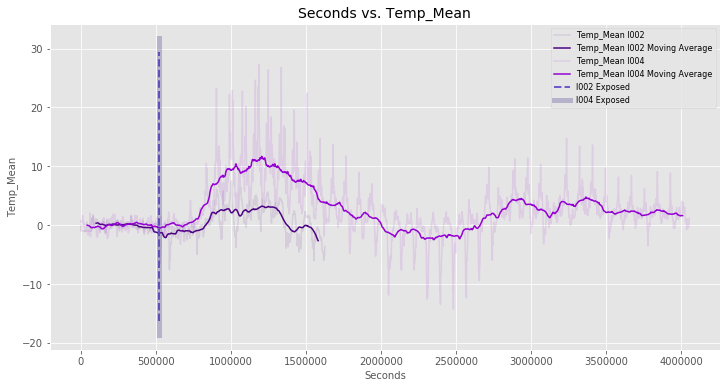

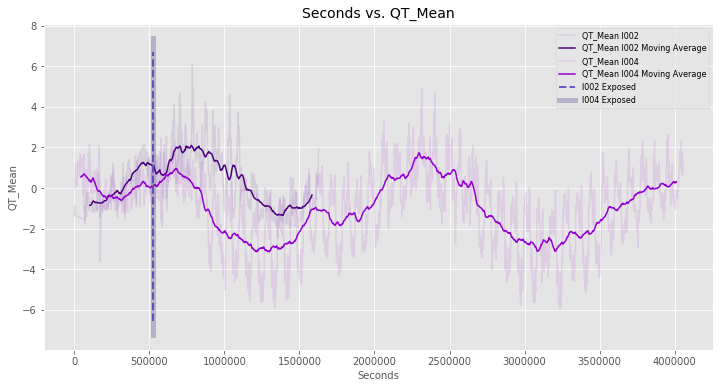

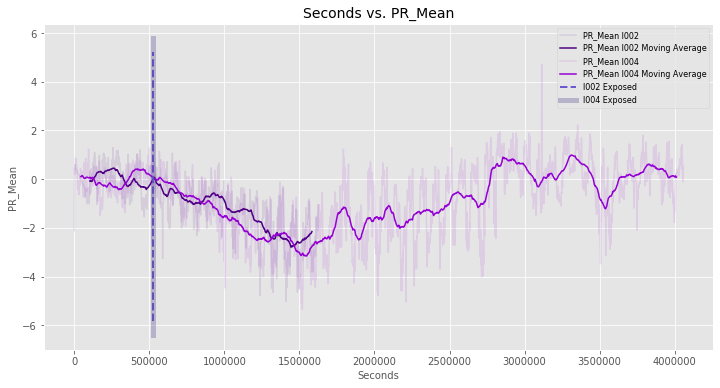

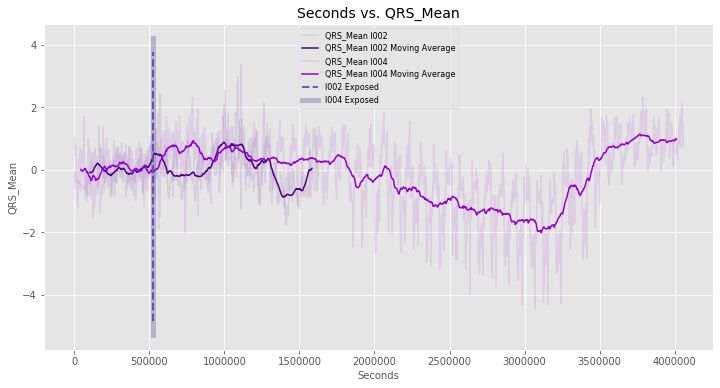

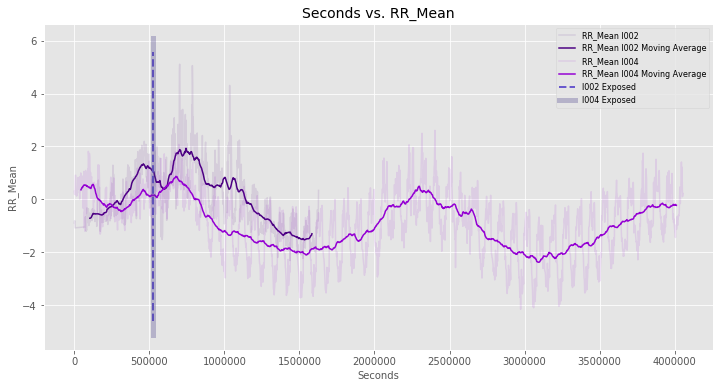

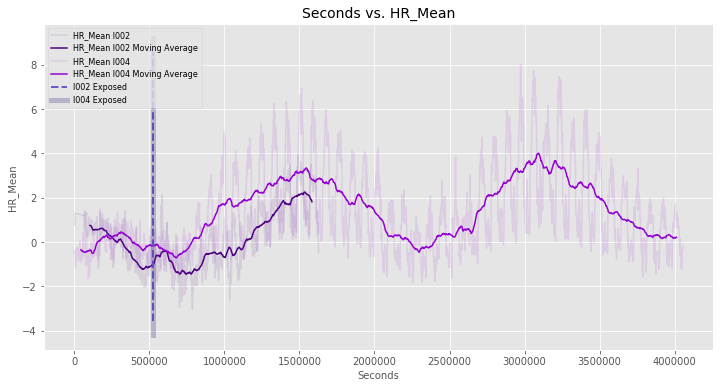

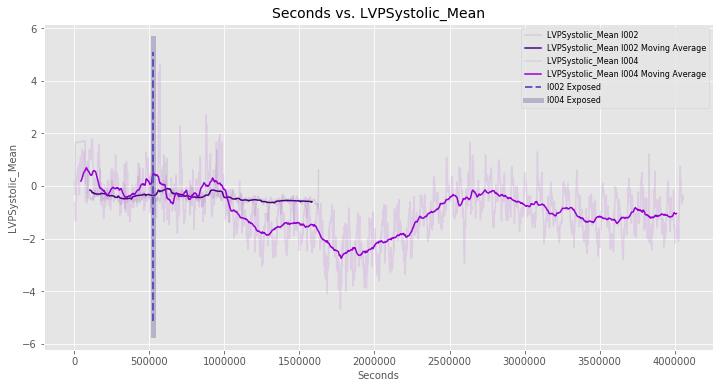

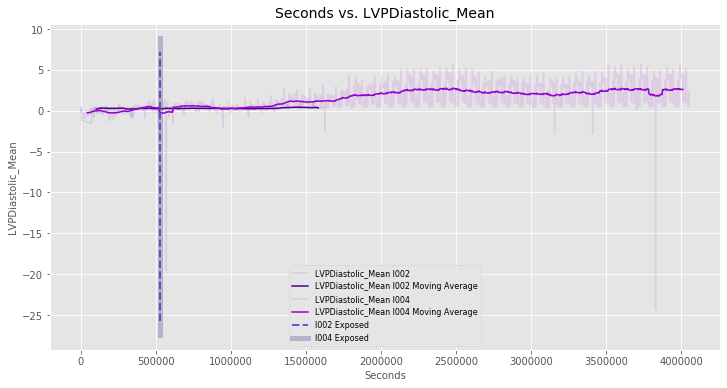

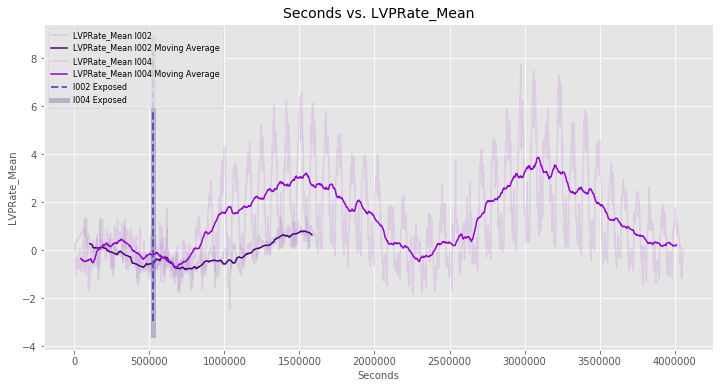

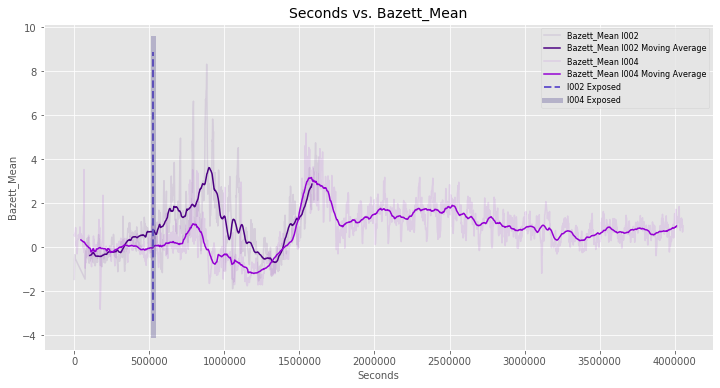

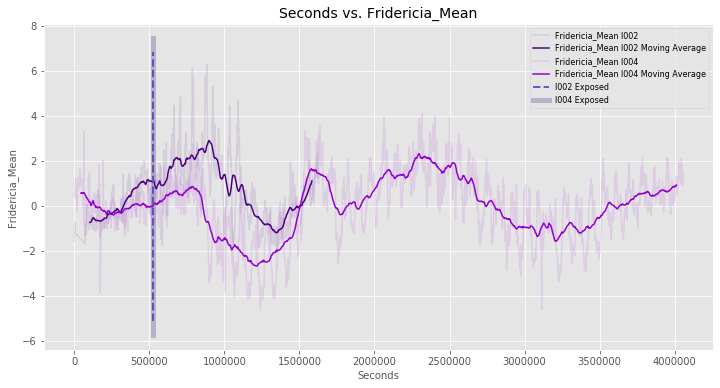

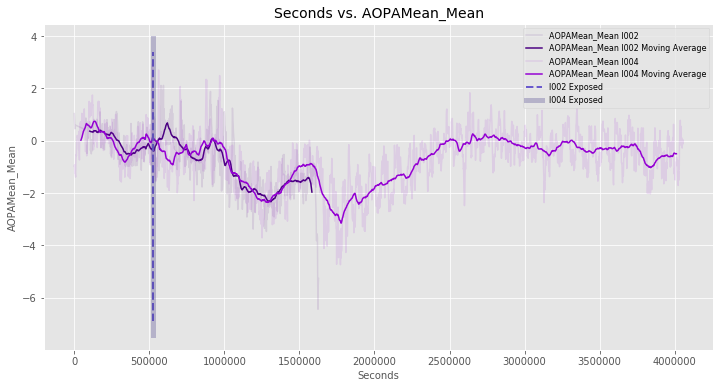

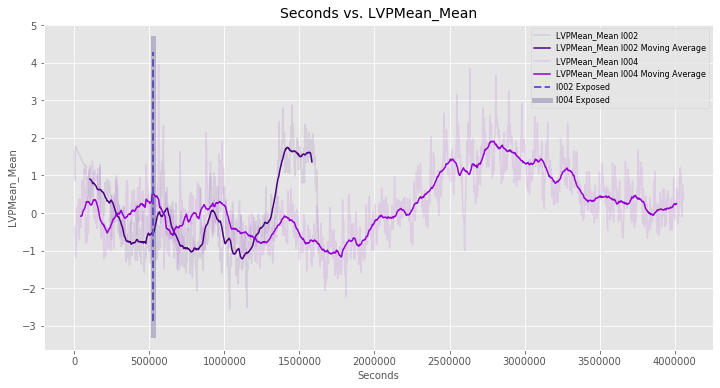

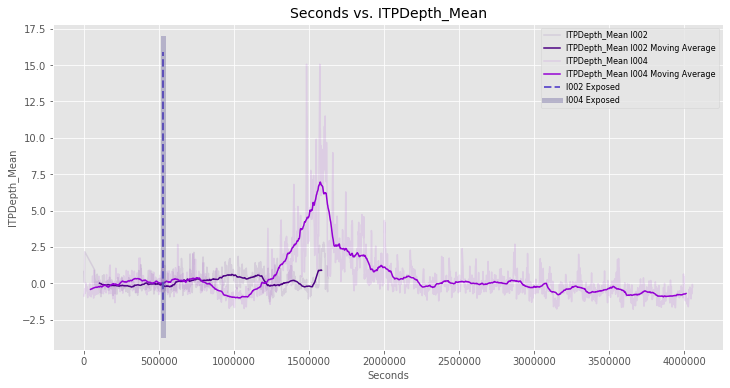

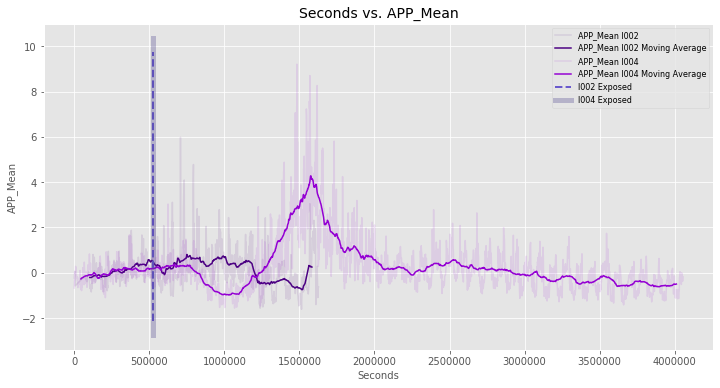

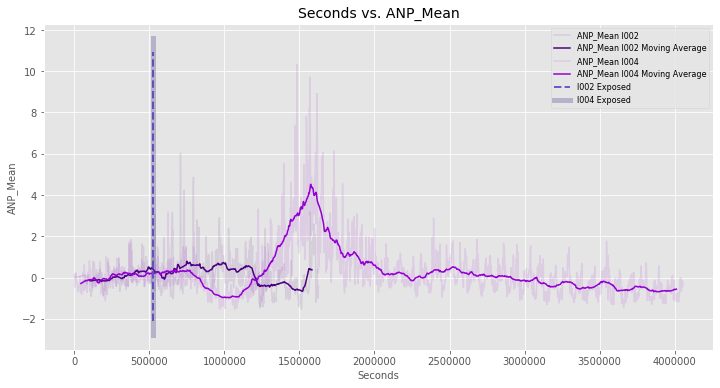

In [112]:
plot('LASSA-Cyno-Aero.csv-Table 1.csv')

# Marburg 1 Trend Visuals

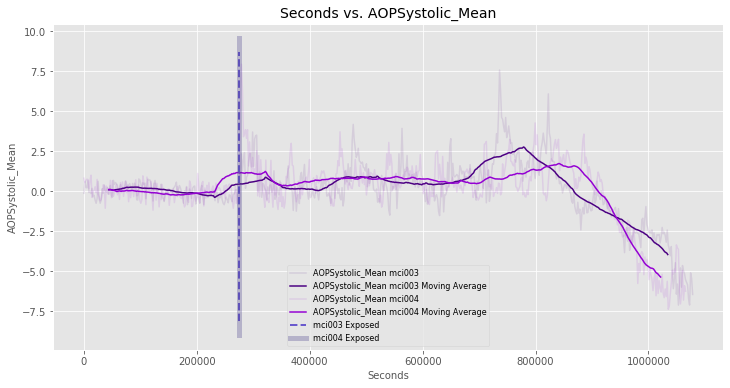

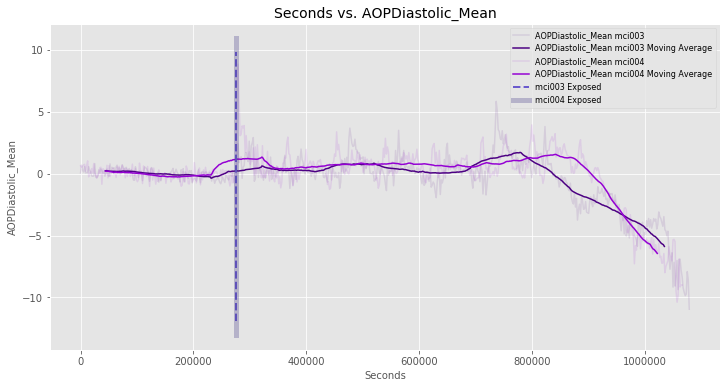

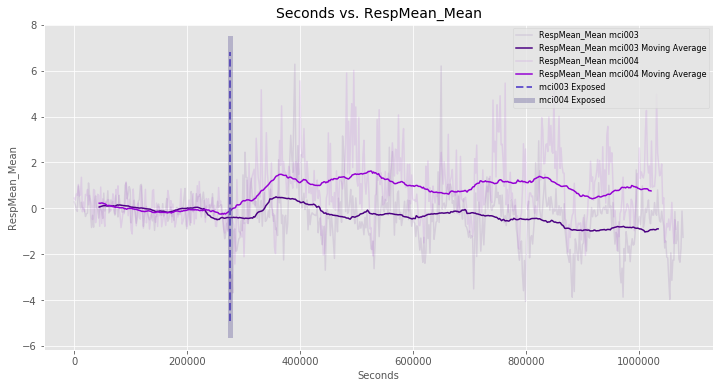

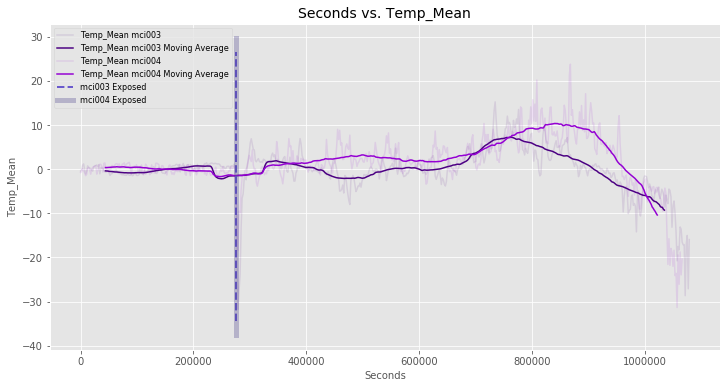

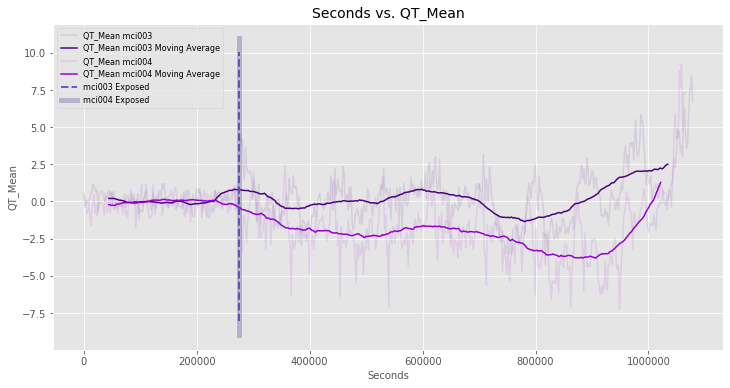

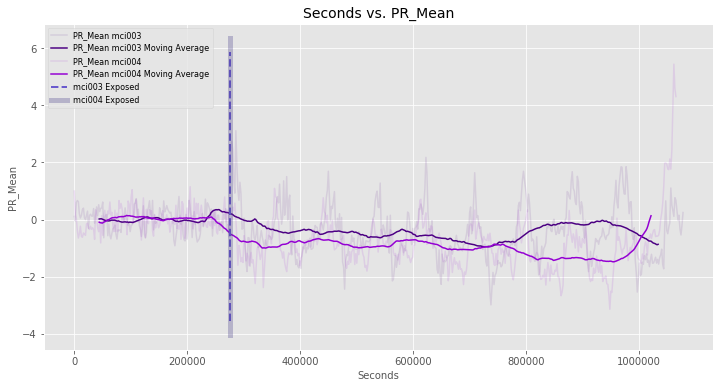

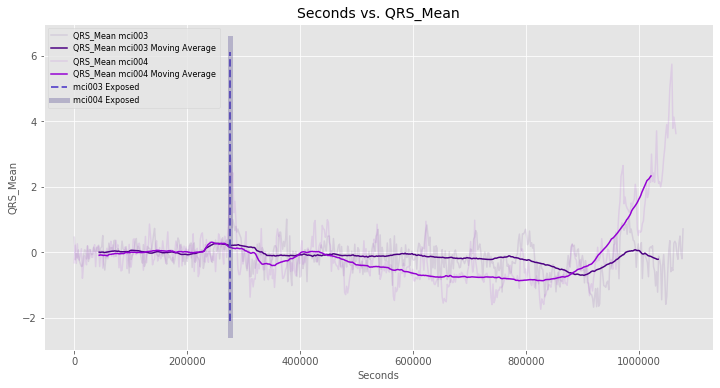

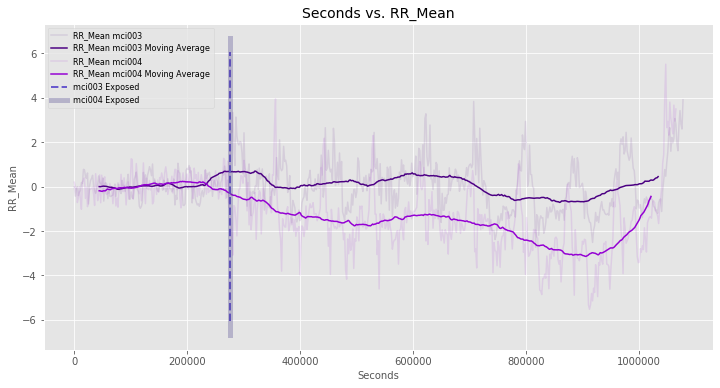

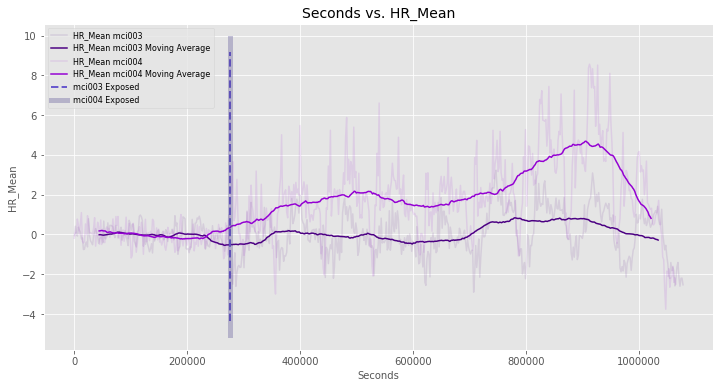

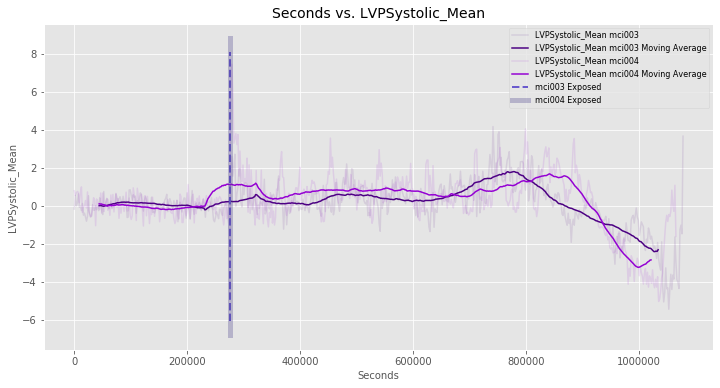

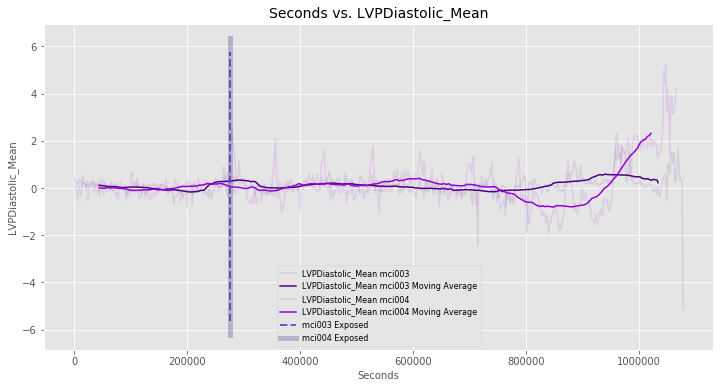

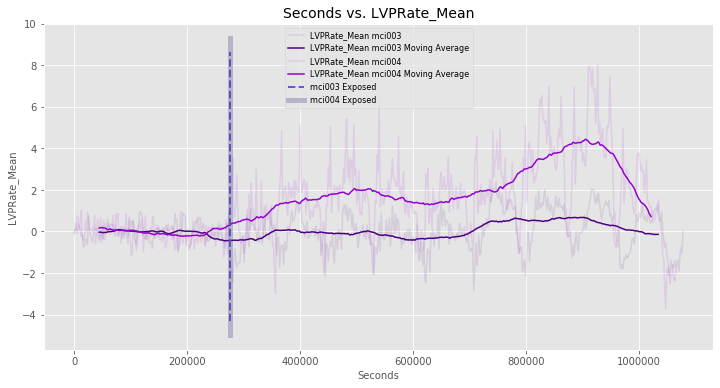

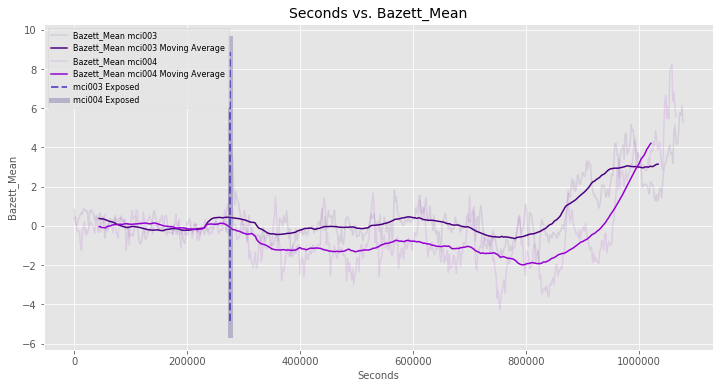

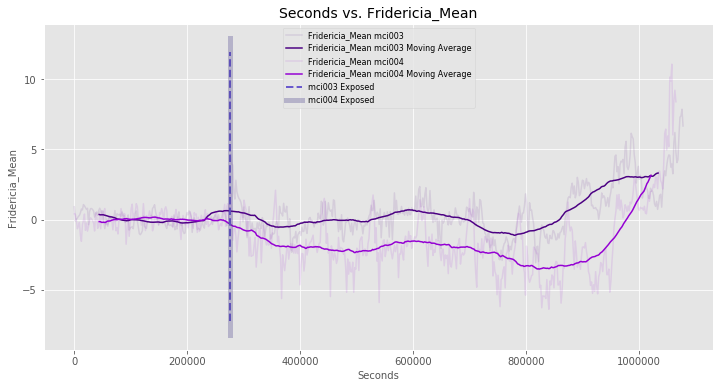

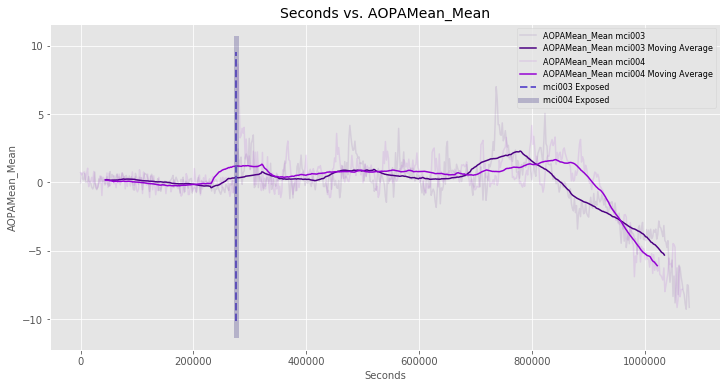

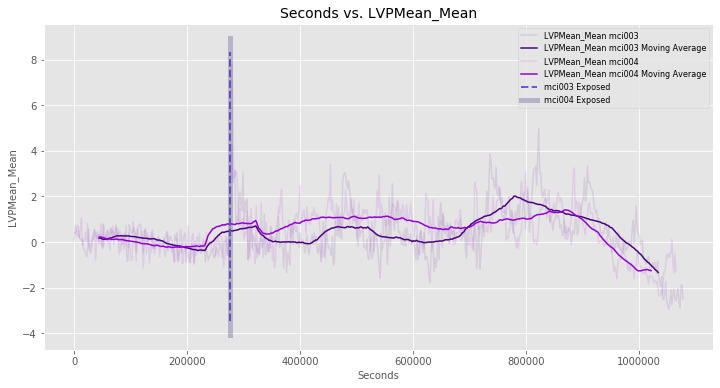

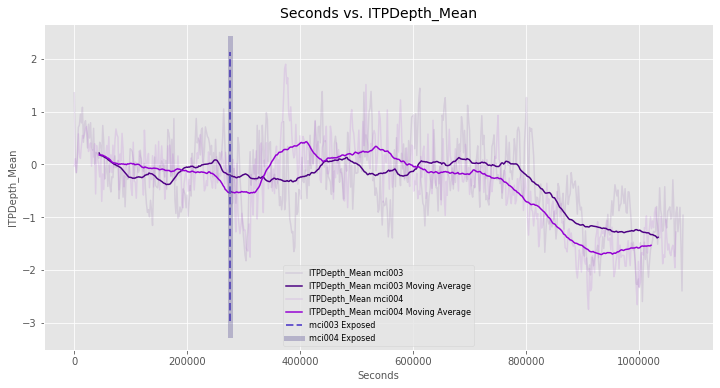

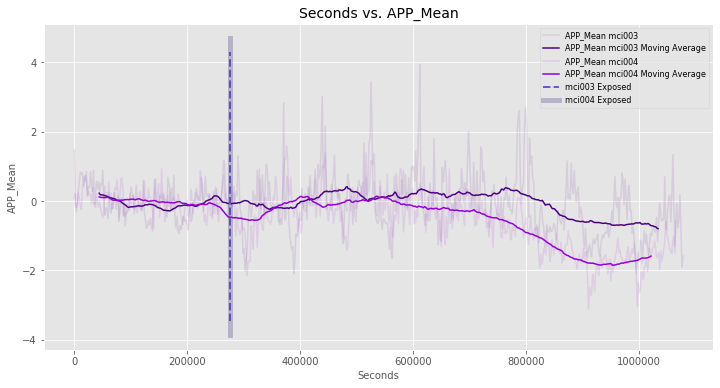

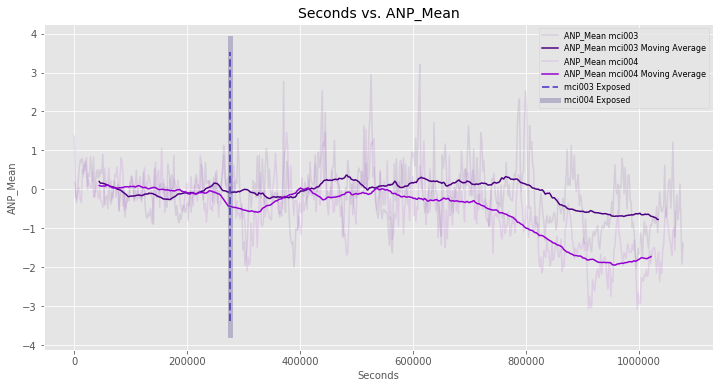

In [113]:
plot('MARV-Cyno-IM.csv-Table 1.csv')

# Marburg 2 Trend Visuals

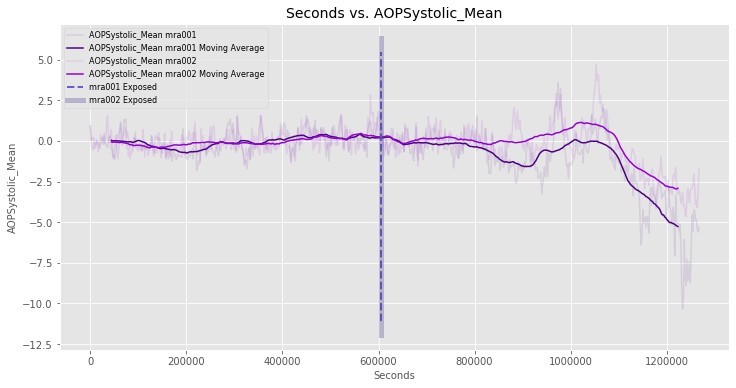

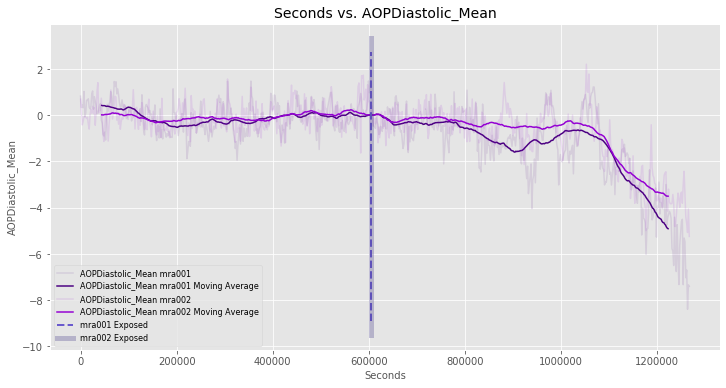

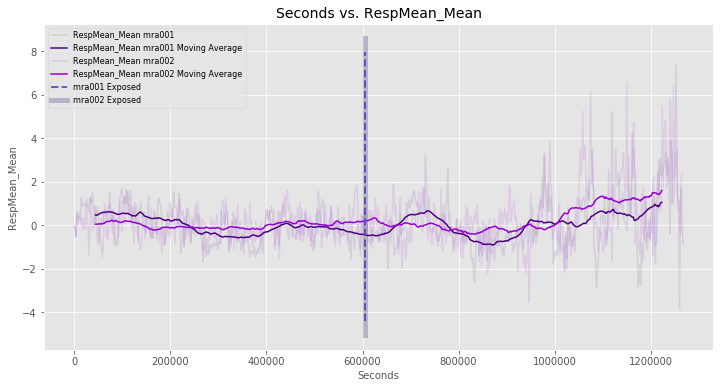

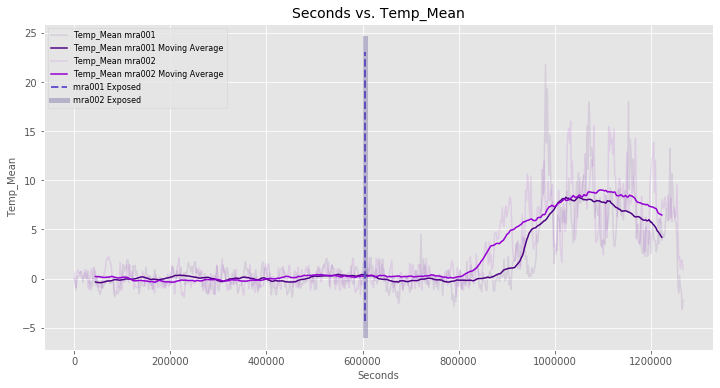

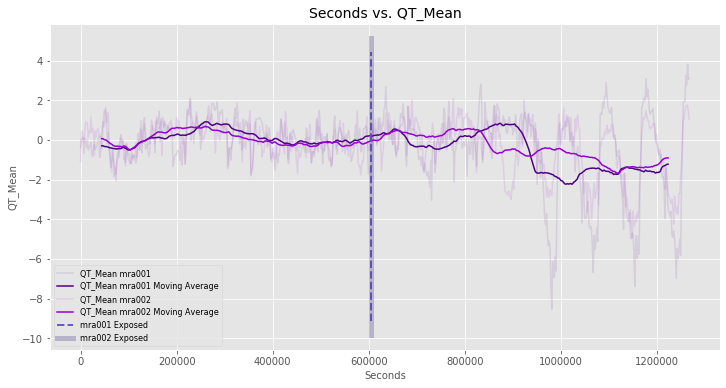

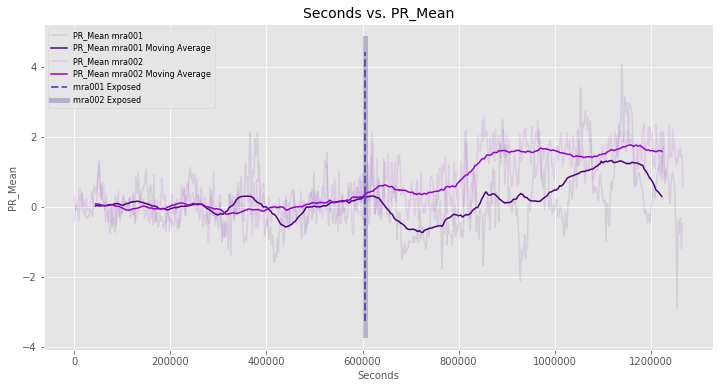

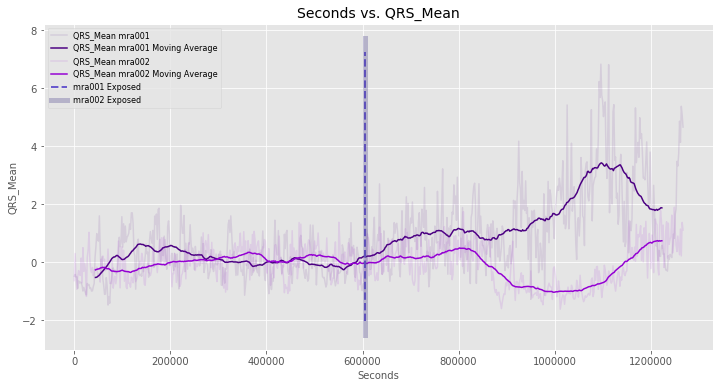

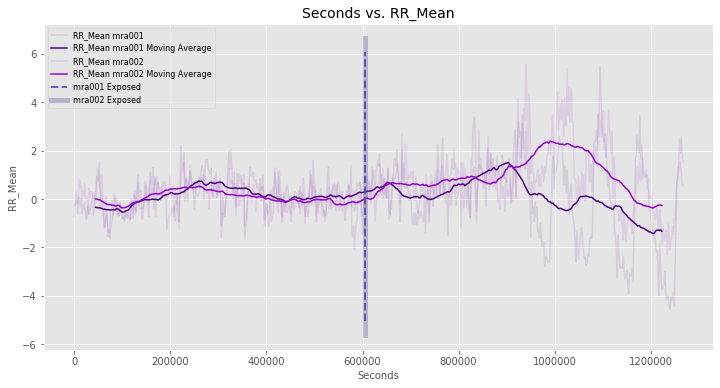

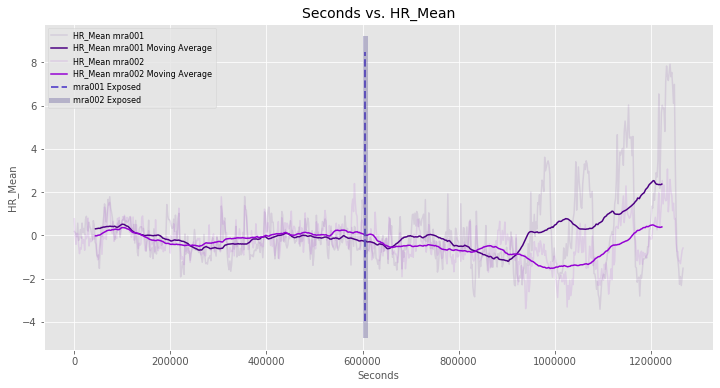

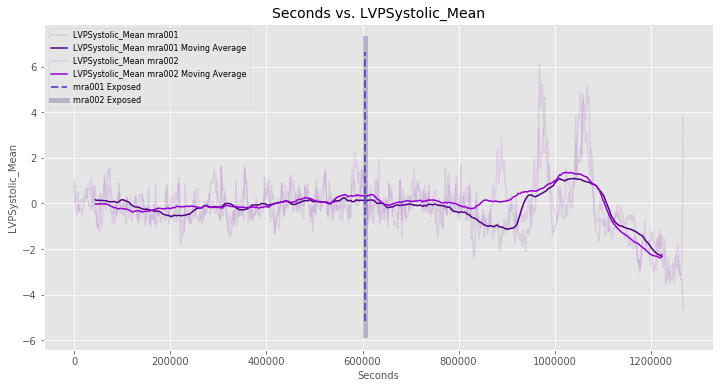

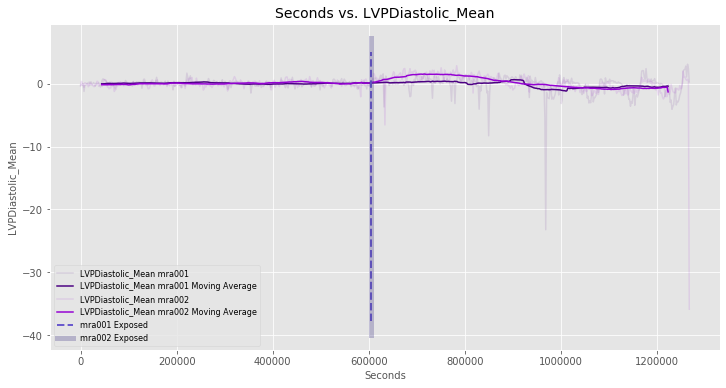

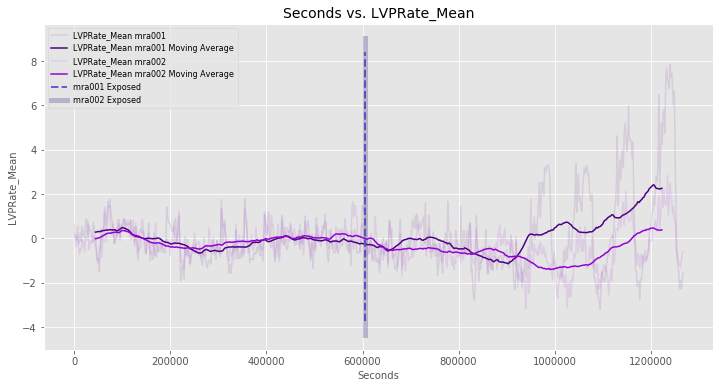

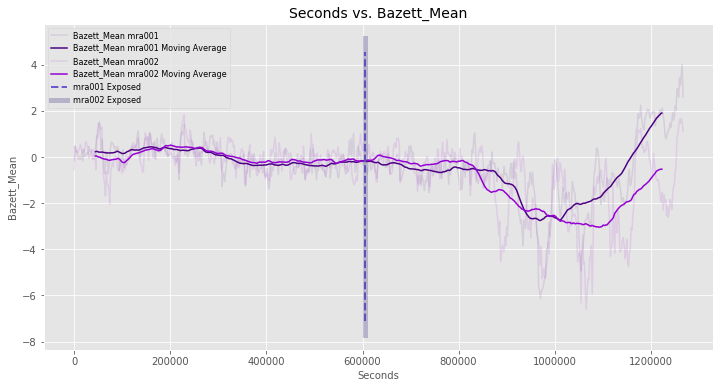

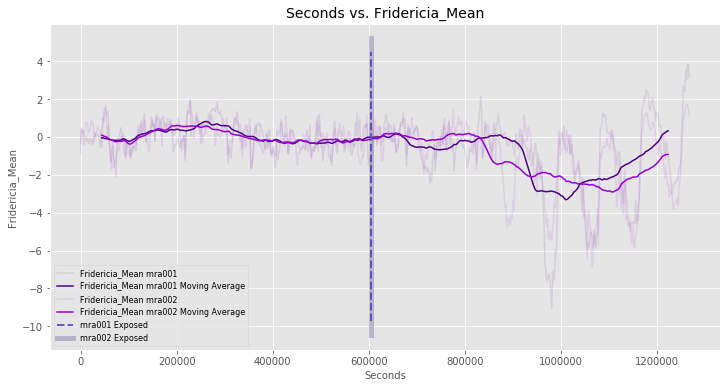

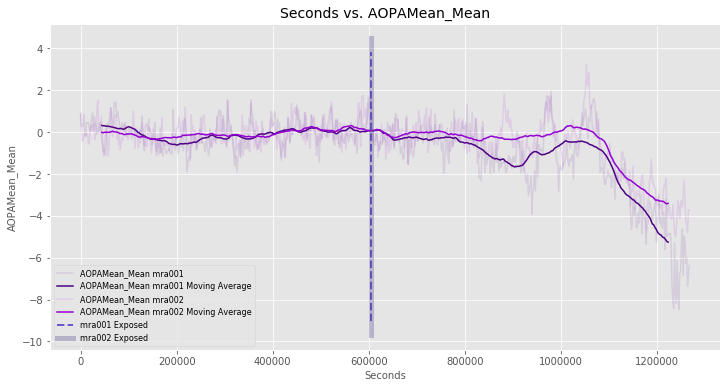

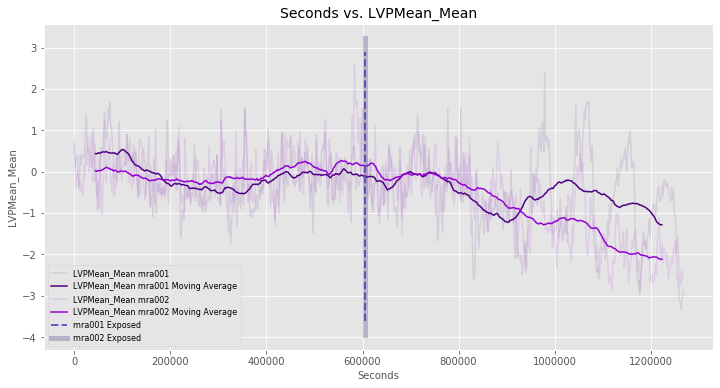

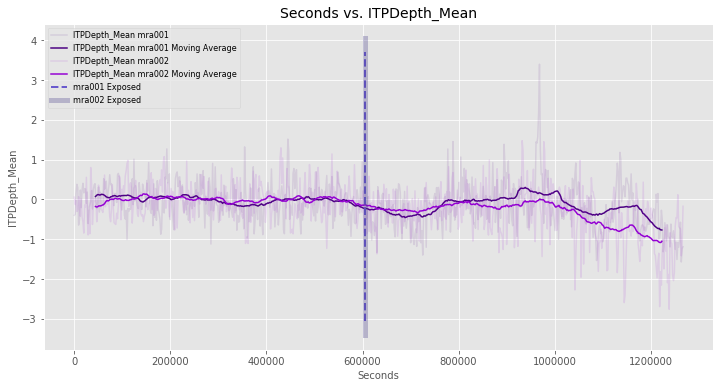

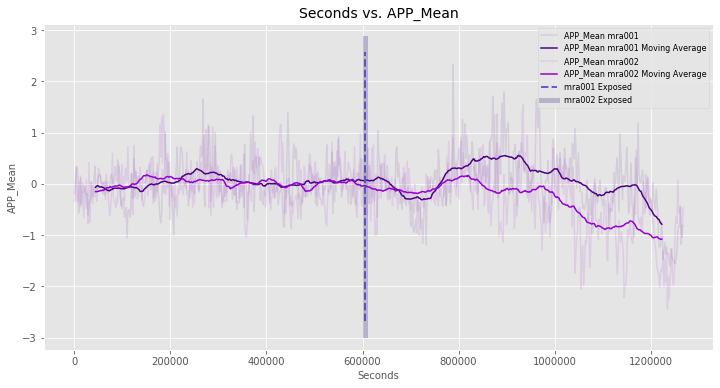

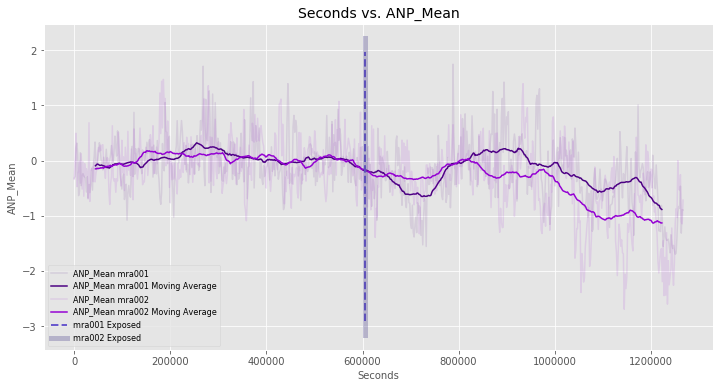

In [114]:
plot('MARV-Rhesus-Aero.csv-Table 1.csv')

# Nipah Trend Visuals

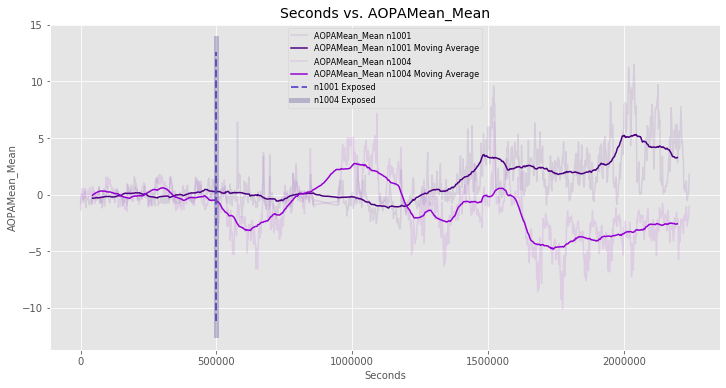

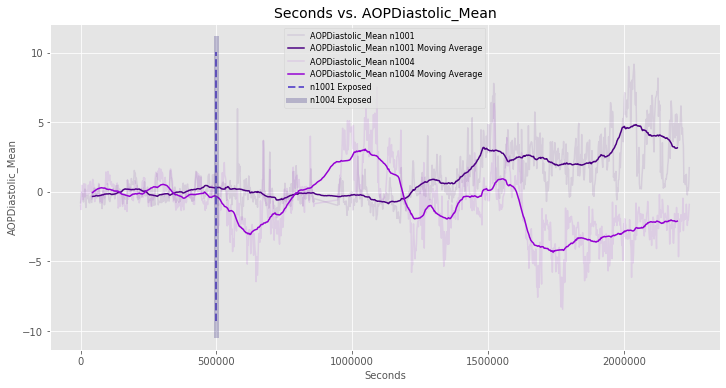

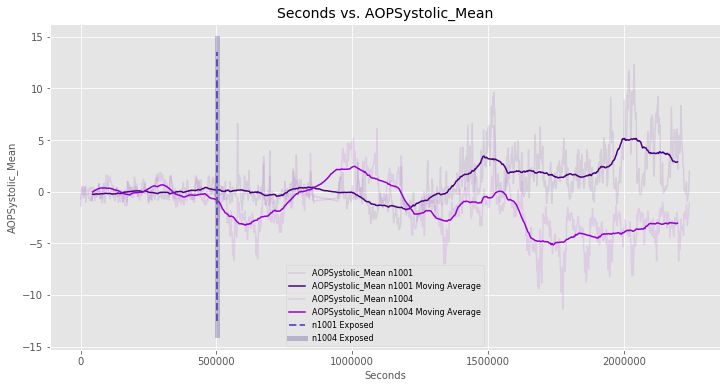

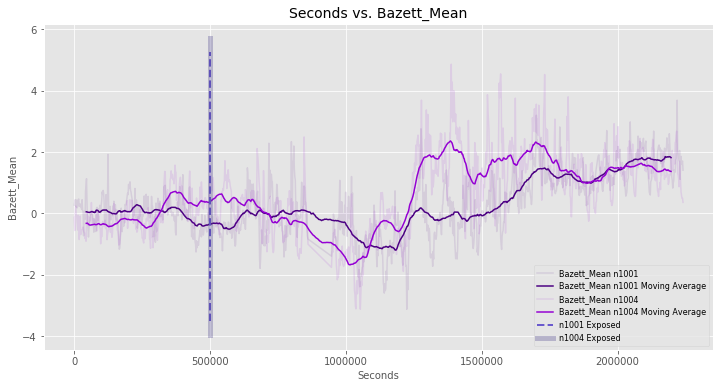

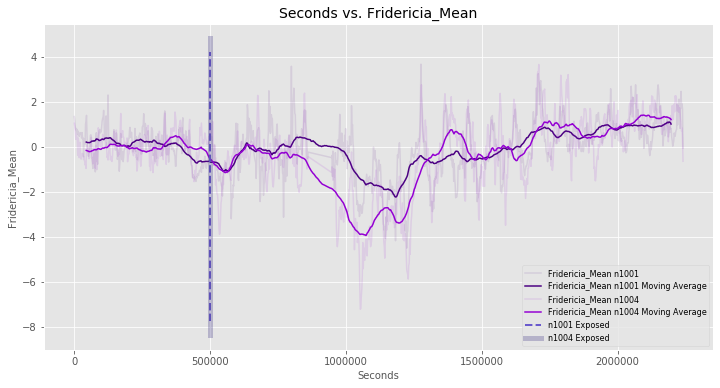

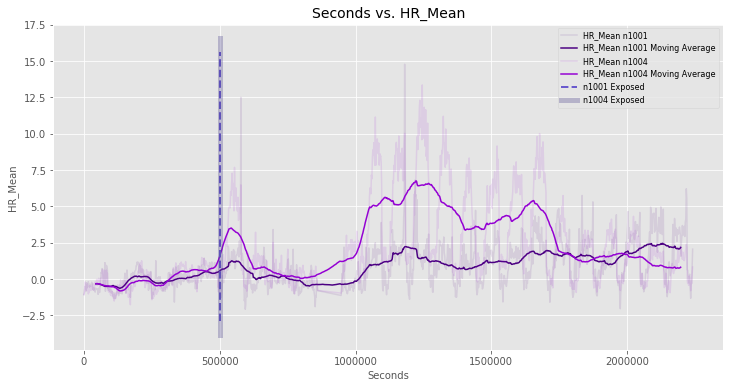

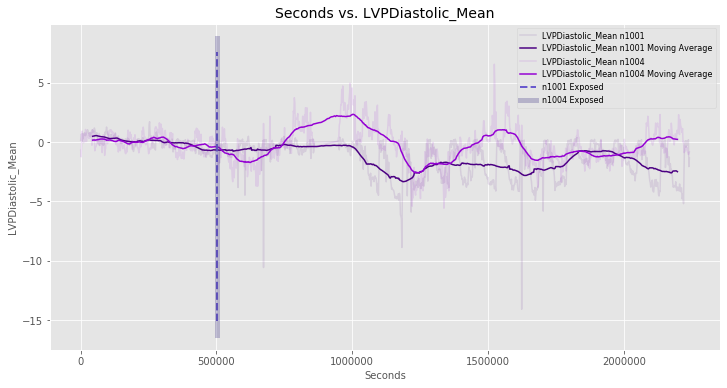

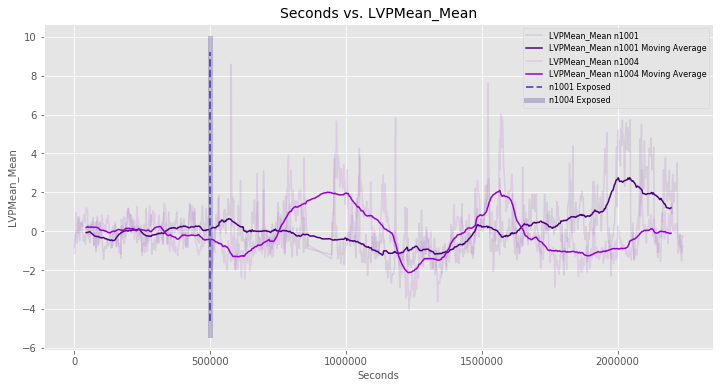

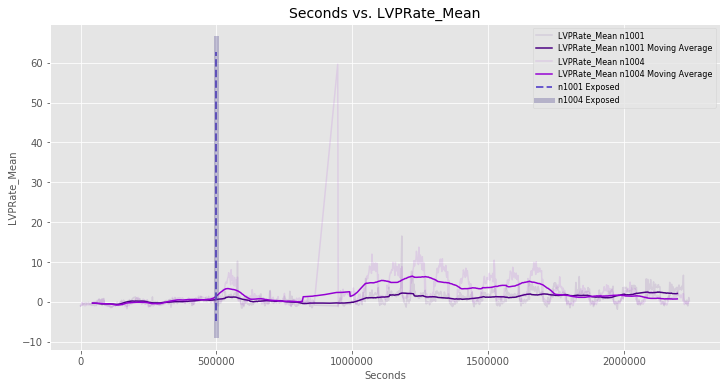

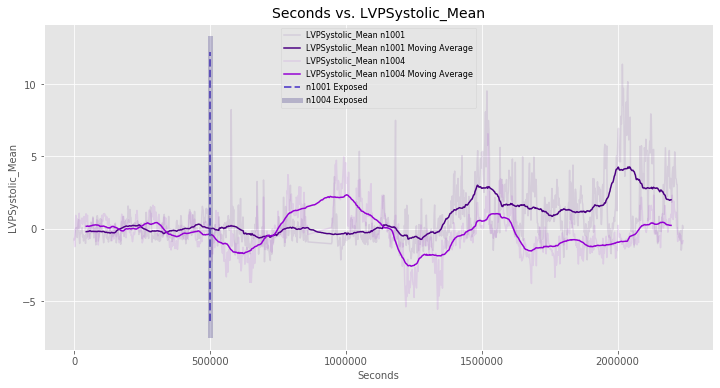

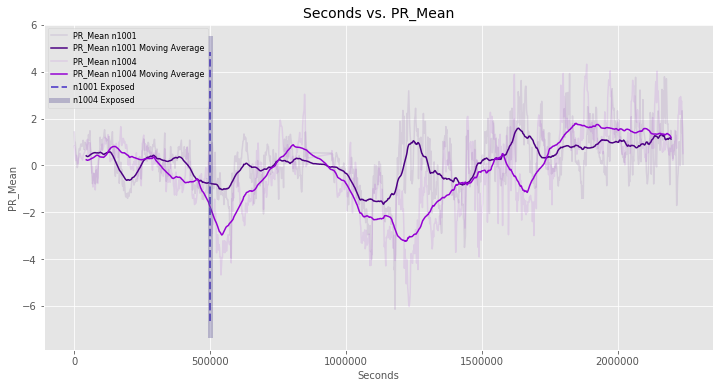

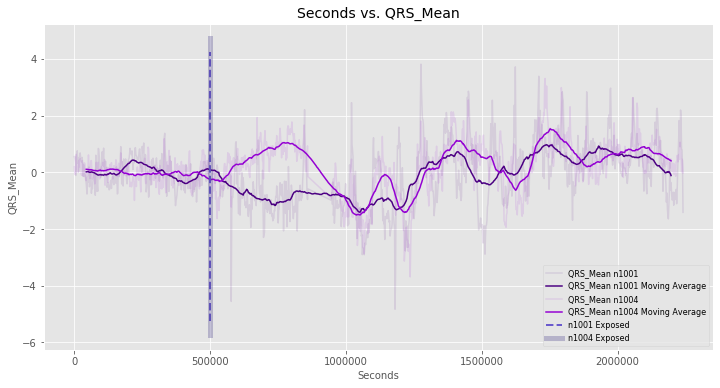

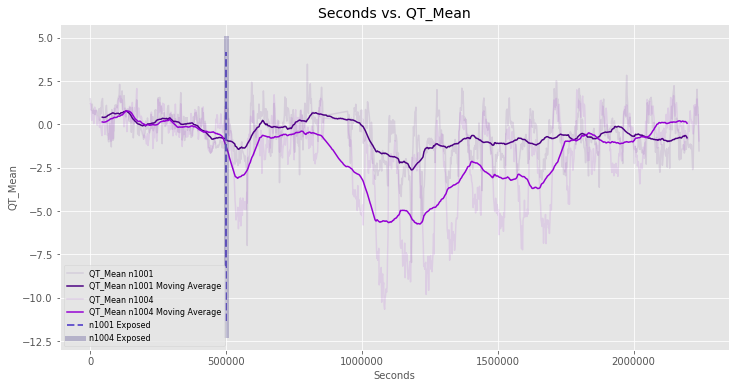

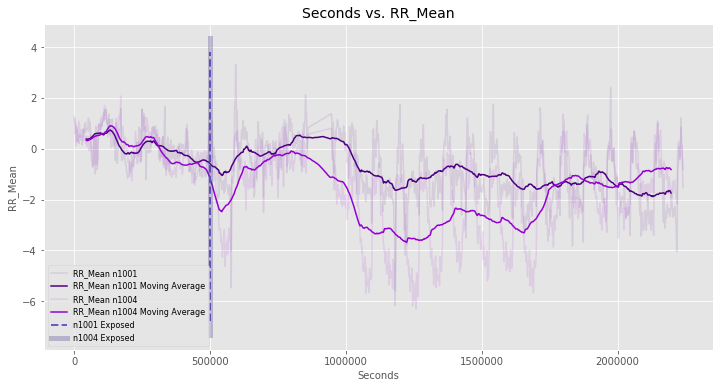

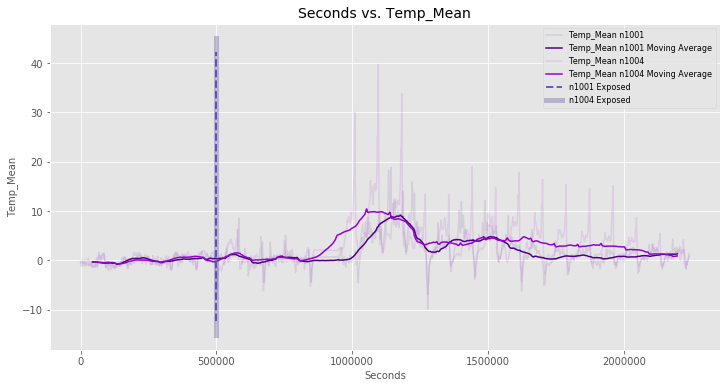

In [115]:
plot('NIPAH-AGM-IT.csv-Table 1.csv')

# Plague Trend Visuals

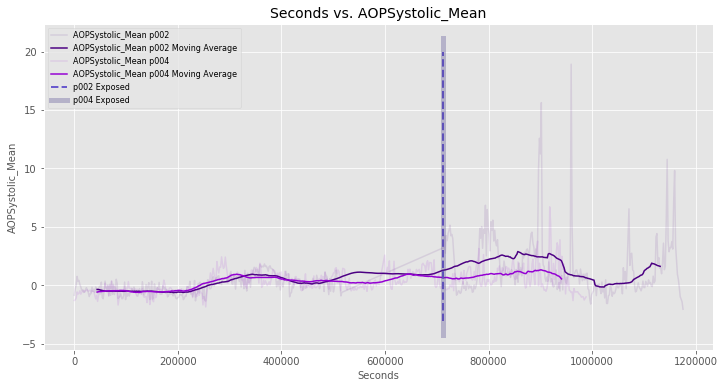

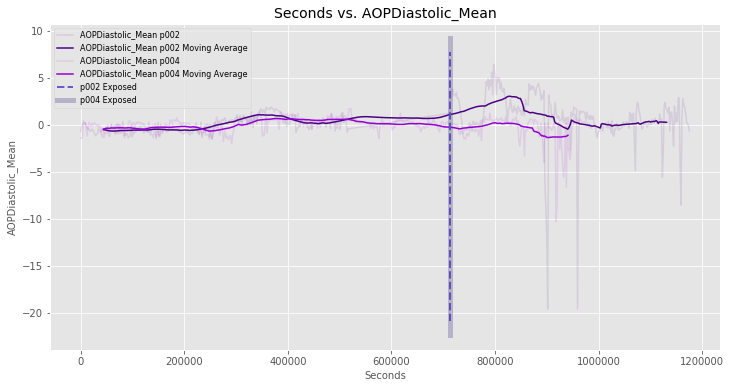

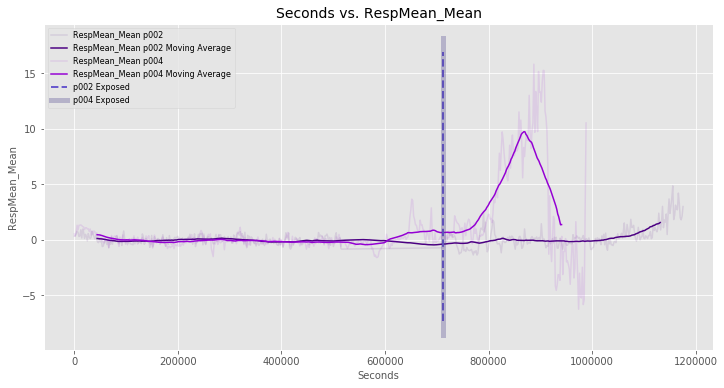

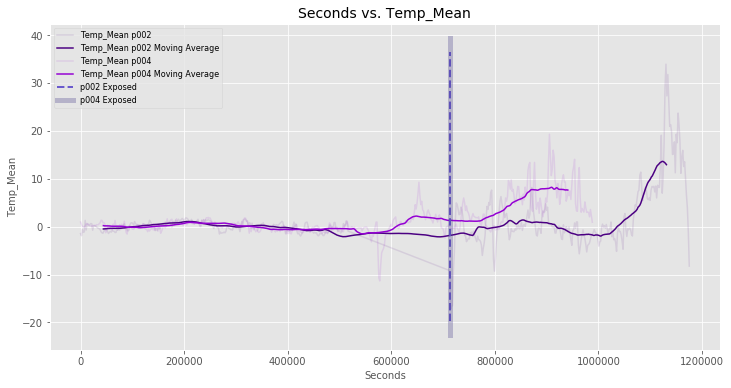

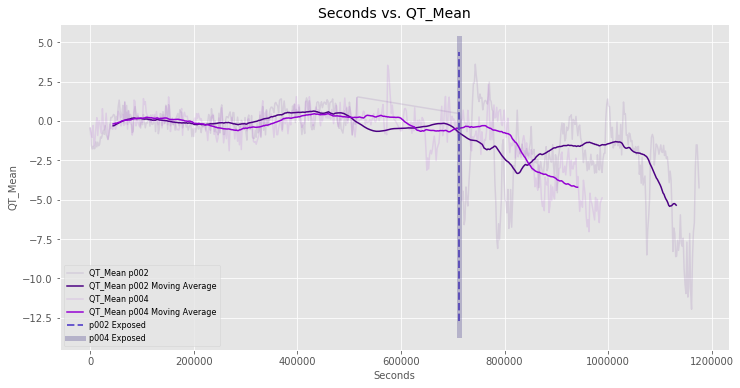

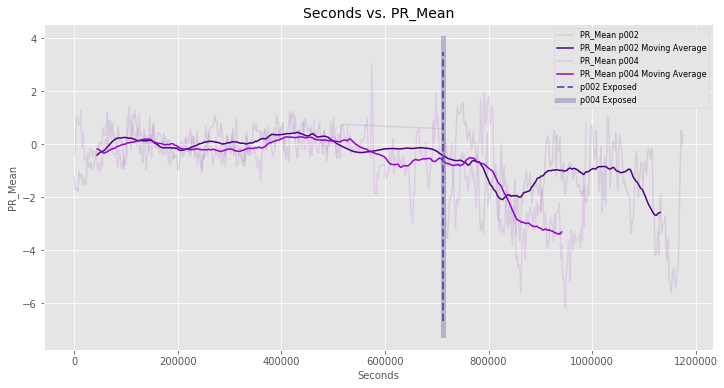

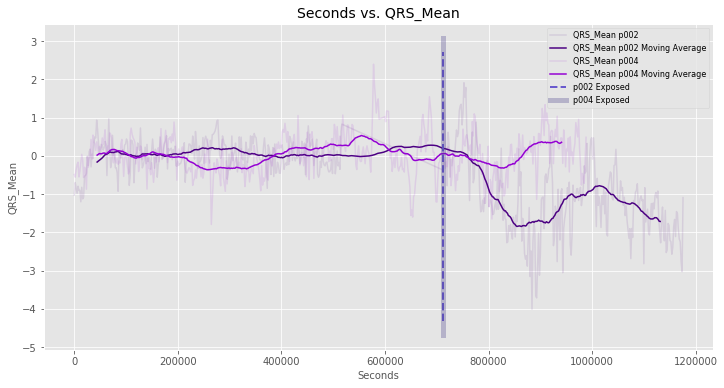

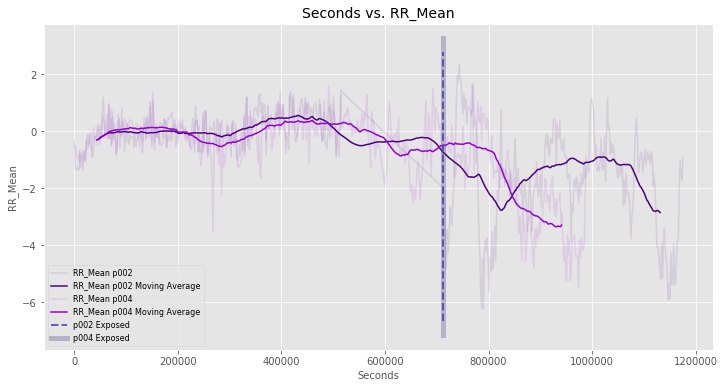

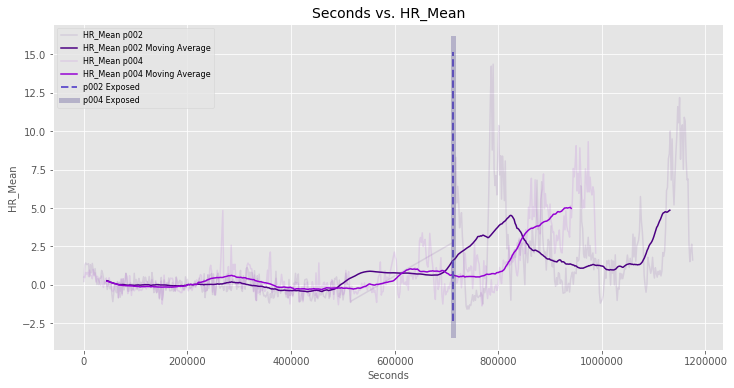

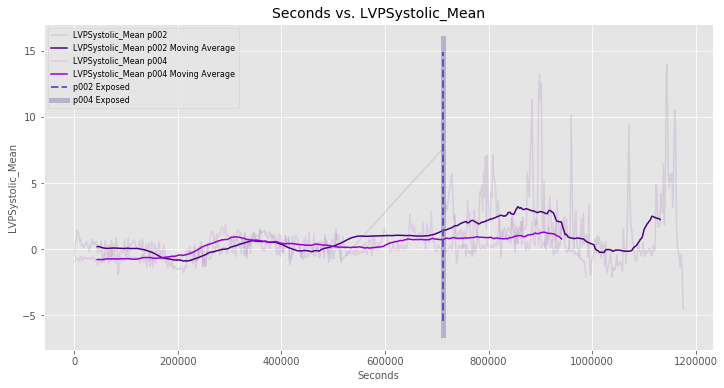

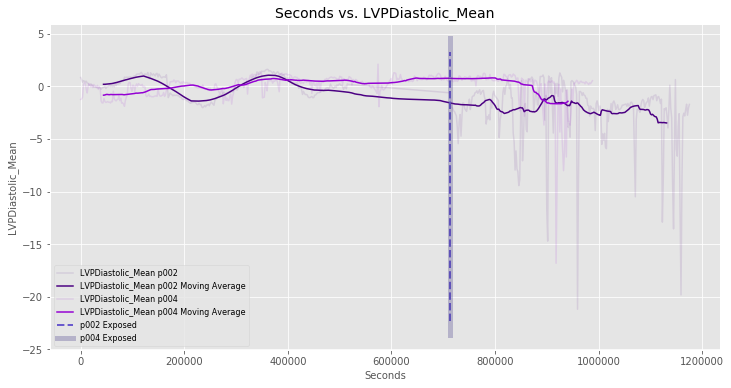

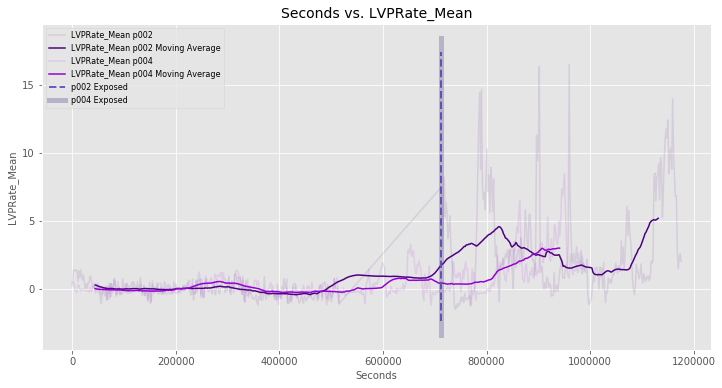

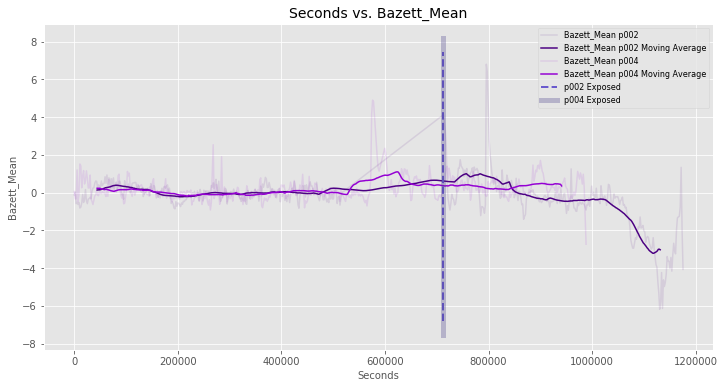

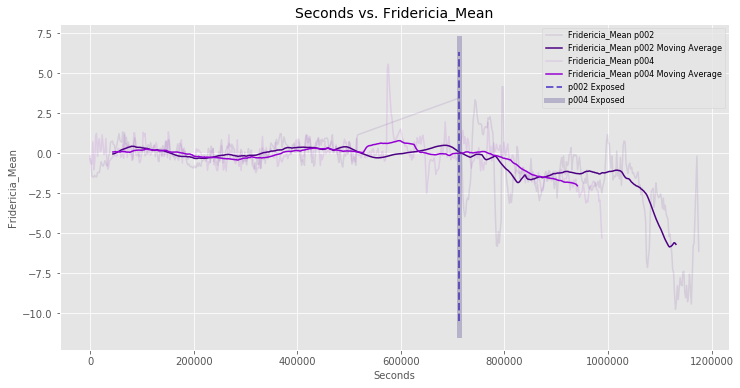

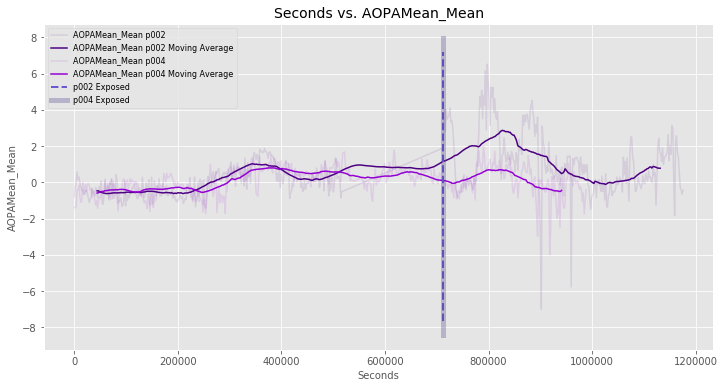

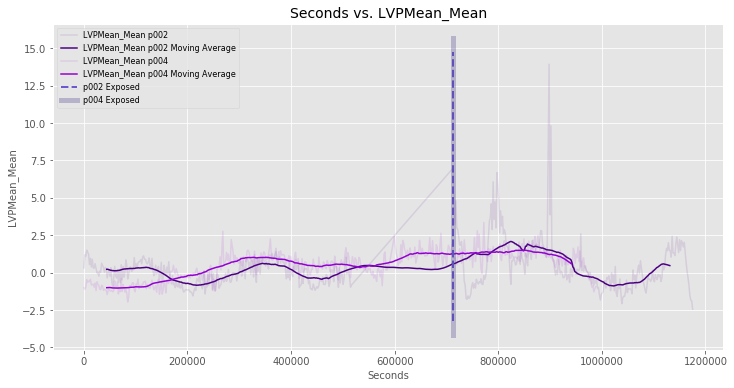

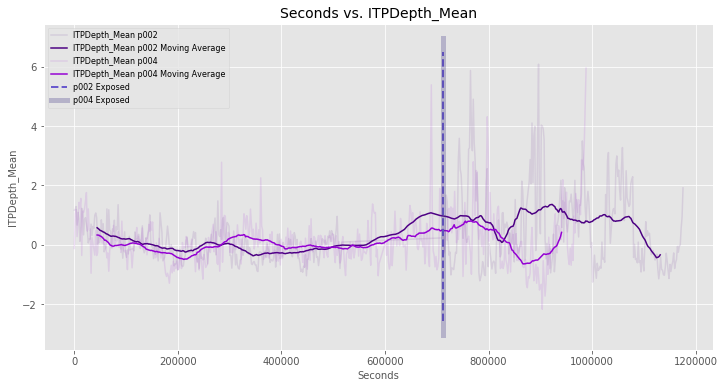

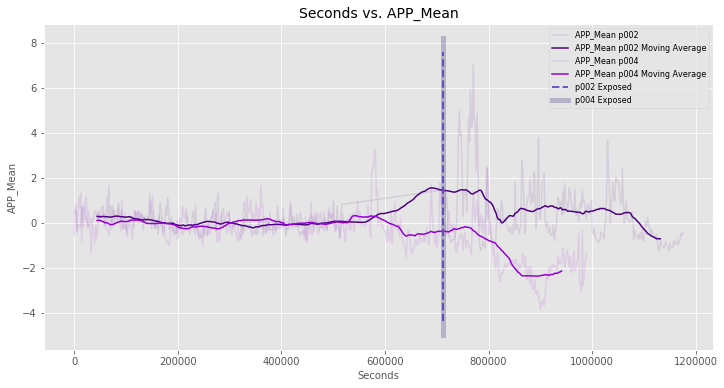

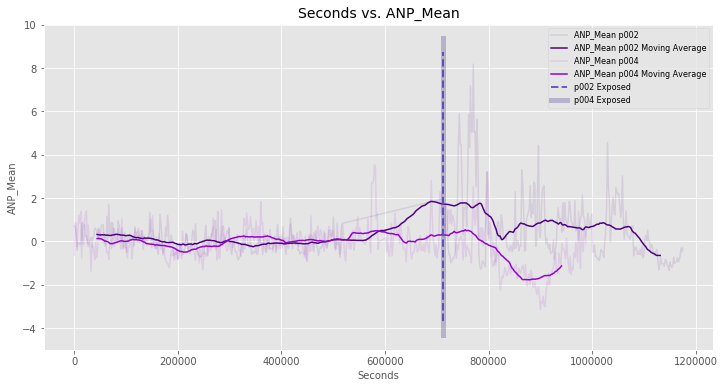

In [116]:
plot('Plague-AGM-Aero.csv-Table 1.csv')